In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
df=pd.DataFrame

In [ ]:
df=pd.read_csv('/gdrive/My Drive/RBIB_Economic_dataset.csv')

In [ ]:
df.head()

,Date,Index of Industrial Production,Deposits,Credit,Non-food Credit,Investment in Govt. Securities,Reserve Money (M0),Broad Money (M3),Cash Reserve Ratio,Statutory Liquidity Ratio,...,3-month (%),6-month (%),All India Consumer Price Index,Consumer Price Index for Industrial Workers,Wholesale Price Index,Primary Articles,Fuel and Power,Manufactured Products,Imports,Exports
0,2011-12-01,2.68,16.98,15.97,15.76,17.15,12.21,16.00,6.0,24.0,...,6.76,6.23,NaN,6.49,7.74,3.59,14.98,7.64,27.08,8.64
1,2011-11-01,6.01,16.45,17.66,17.36,16.09,13.72,15.48,6.0,24.0,...,4.98,4.14,NaN,9.34,9.46,8.90,15.48,8.17,35.57,3.08
2,2011-10-01,-4.98,15.29,19.31,18.95,13.61,18.39,14.88,6.0,24.0,...,5.73,4.75,NaN,9.39,9.87,10.96,14.79,8.05,26.84,23.85
3,2011-09-01,2.5,17.48,19.55,19.31,15.63,15.42,16.62,6.0,24.0,...,5.15,3.70,NaN,10.06,10.00,12.22,14.02,8.00,34.71,39.91
4,2011-08-01,3.4,17.96,20.68,20.18,15.34,16.42,17.06,6.0,24.0,...,2.91,2.89,NaN,8.99,9.78,12.46,12.91,7.87,47.50,39.54


In [ ]:
df.isnull().sum().sum()

38

In [ ]:
print(df.isnull().sum())

Date                                              0
   Index of Industrial Production                 0
Deposits                                          0
Credit                                            0
Non-food Credit                                   0
Investment in Govt. Securities                    0
Reserve Money (M0)                                0
Broad Money (M3)                                  0
Cash Reserve Ratio                                0
Statutory Liquidity Ratio                         0
Cash-Deposit Ratio                                0
Credit-Deposit Ratio                              0
Incremental Credit-Deposit Ratio                  0
Investment-Deposit Ratio                          0
Incremental Investment-Deposit Ratio              0
Policy Repo Rate                                  0
Reverse Repo Rate                                 0
Marginal Standing Facility (MSF) Rate             0
Bank Rate                                         0
Base Rate   

In [ ]:
df['10-Year G-Sec Par Yield (FBIL)'] = df['10-Year G-Sec Par Yield (FBIL)'].fillna(df['10-Year G-Sec Par Yield (FBIL)'].mean())
df['All India Consumer Price Index'] = df['All India Consumer Price Index'].fillna(df['All India Consumer Price Index'].mean())

In [ ]:
df.isnull().sum().sum()

16

In [ ]:
print(df.isnull().sum())

Date                                             0
   Index of Industrial Production                0
Deposits                                         0
Credit                                           0
Non-food Credit                                  0
Investment in Govt. Securities                   0
Reserve Money (M0)                               0
Broad Money (M3)                                 0
Cash Reserve Ratio                               0
Statutory Liquidity Ratio                        0
Cash-Deposit Ratio                               0
Credit-Deposit Ratio                             0
Incremental Credit-Deposit Ratio                 0
Investment-Deposit Ratio                         0
Incremental Investment-Deposit Ratio             0
Policy Repo Rate                                 0
Reverse Repo Rate                                0
Marginal Standing Facility (MSF) Rate            0
Bank Rate                                        0
Base Rate                      

In [ ]:
df['Savings Deposit Rate'].fillna(method = 'ffill', inplace = True)

In [ ]:
df['182-Day Treasury Bill (Primary) Yield'] = df['182-Day Treasury Bill (Primary) Yield'].fillna(df['182-Day Treasury Bill (Primary) Yield'].mean())
df['91-Day Treasury Bill (Primary) Yield'] = df['91-Day Treasury Bill (Primary) Yield'].fillna(df['91-Day Treasury Bill (Primary) Yield'].mean())

In [ ]:
del df['Base Rate']
del df['Term Deposit Rate >1 Year']

In [ ]:
df['Imports'] = df['Imports'].fillna(df['Imports'].mean())
df['Exports'] = df['Exports'].fillna(df['Exports'].mean())

In [ ]:
print(df.isnull().sum())

Date                                             0
   Index of Industrial Production                0
Deposits                                         0
Credit                                           0
Non-food Credit                                  0
Investment in Govt. Securities                   0
Reserve Money (M0)                               0
Broad Money (M3)                                 0
Cash Reserve Ratio                               0
Statutory Liquidity Ratio                        0
Cash-Deposit Ratio                               0
Credit-Deposit Ratio                             0
Incremental Credit-Deposit Ratio                 0
Investment-Deposit Ratio                         0
Incremental Investment-Deposit Ratio             0
Policy Repo Rate                                 0
Reverse Repo Rate                                0
Marginal Standing Facility (MSF) Rate            0
Bank Rate                                        0
Savings Deposit Rate           

In [ ]:
train_date = pd.to_datetime(df['Date'])
train_date.head()

0   2011-12-01
1   2011-11-01
2   2011-10-01
3   2011-09-01
4   2011-08-01
Name: Date, dtype: datetime64[ns]

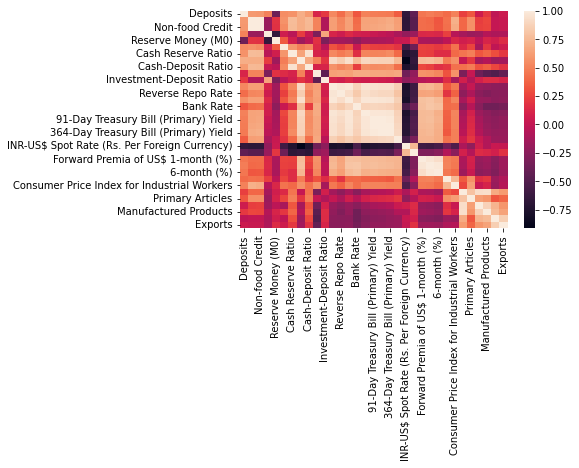

In [ ]:
dataplot=sb.heatmap(df.corr())

In [ ]:
df = df[['Date', 'Imports', 'Exports', 'Bank Rate', 'Reverse Repo Rate', '364-Day Treasury Bill (Primary) Yield', 'Consumer Price Index for Industrial Workers', 'Policy Repo Rate', 'Cash Reserve Ratio', 'Deposits']]

In [ ]:
df.head()

,Date,Imports,Exports,Bank Rate,Reverse Repo Rate,364-Day Treasury Bill (Primary) Yield,Consumer Price Index for Industrial Workers,Policy Repo Rate,Cash Reserve Ratio,Deposits
0,2011-12-01,27.08,8.64,6.0,7.50,8.35,6.49,8.50,6.0,16.98
1,2011-11-01,35.57,3.08,6.0,7.50,8.45,9.34,8.50,6.0,16.45
2,2011-10-01,26.84,23.85,6.0,7.50,8.68,9.39,8.50,6.0,15.29
3,2011-09-01,34.71,39.91,6.0,7.25,8.46,10.06,8.25,6.0,17.48
4,2011-08-01,47.50,39.54,6.0,7.00,8.31,8.99,8.00,6.0,17.96


<AxesSubplot:>

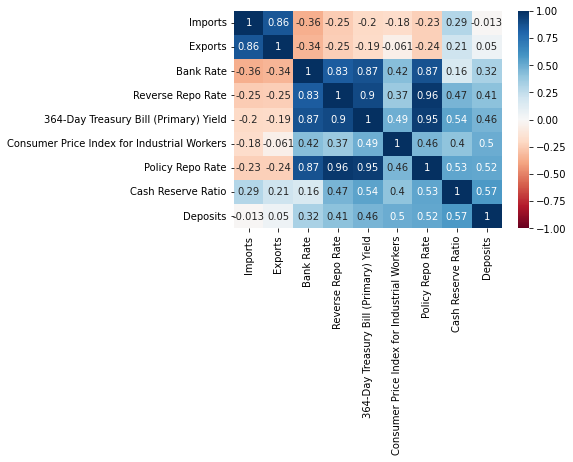

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
df.head()

,Date,Imports,Exports,Bank Rate,Reverse Repo Rate,364-Day Treasury Bill (Primary) Yield,Consumer Price Index for Industrial Workers,Policy Repo Rate,Cash Reserve Ratio,Deposits
0,2011-12-01,27.08,8.64,6.0,7.50,8.35,6.49,8.50,6.0,16.98
1,2011-11-01,35.57,3.08,6.0,7.50,8.45,9.34,8.50,6.0,16.45
2,2011-10-01,26.84,23.85,6.0,7.50,8.68,9.39,8.50,6.0,15.29
3,2011-09-01,34.71,39.91,6.0,7.25,8.46,10.06,8.25,6.0,17.48
4,2011-08-01,47.50,39.54,6.0,7.00,8.31,8.99,8.00,6.0,17.96


Importing libraries for LSTM

In [ ]:
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential

In [ ]:
##Excluding Time as Variable in our dataframe.

In [ ]:
cols = list(df)[1:10]

In [ ]:
##Creating new dataframe without date.

In [ ]:
df_training = df[cols].astype(float)

In [ ]:
df_training.head()

,Imports,Exports,Bank Rate,Reverse Repo Rate,364-Day Treasury Bill (Primary) Yield,Consumer Price Index for Industrial Workers,Policy Repo Rate,Cash Reserve Ratio,Deposits
0,27.08,8.64,6.0,7.50,8.35,6.49,8.50,6.0,16.98
1,35.57,3.08,6.0,7.50,8.45,9.34,8.50,6.0,16.45
2,26.84,23.85,6.0,7.50,8.68,9.39,8.50,6.0,15.29
3,34.71,39.91,6.0,7.25,8.46,10.06,8.25,6.0,17.48
4,47.50,39.54,6.0,7.00,8.31,8.99,8.00,6.0,17.96


Normalising the dataset

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_training)
df_training_scaled = scaler.transform(df_training)

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1
n_past = 12

In [ ]:
for i in range(n_past,len(df_training_scaled) - n_future +1):
  trainX.append(df_training_scaled[i - n_past:i, 0:df_training.shape[1]])
  trainY.append(df_training_scaled[i + n_future - 1:i + n_future, 0])


In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (129, 12, 9).
trainY shape == (129, 1).


#Defining Autoencoder model

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 64)            18944     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,393
Trainable params: 31,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/100
8/8 [==============================] - 4s 86ms/step - loss: 0.7174 - val_loss: 3.0354
Epoch 2/100
8/8 [==============================] - 0s 19ms/step - loss: 0.6403 - val_loss: 2.5441
Epoch 3/100
8/8 [==============================] - 0s 18ms/step - loss: 0.5961 - val_loss: 2.2226
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 0.4937 - val_loss: 5.6550
Epoch 5/100
8/8 [==============================] - 0s 21ms/step - loss: 0.3844 - val_loss: 23.0406
Epoch 6/100
8/8 [==============================] - 0s 19ms/step - loss: 0.3257 - val_loss: 14.9196
Epoch 7/100
8/8 [==============================] - 0s 20ms/step - loss: 0.3551 - val_loss: 2.5367
Epoch 8/100
8/8 [==============================] - 0s 20ms/step - loss: 0.3539 - val_loss: 2.9071
Epoch 9/100
8/8 [==============================] - 0s 18ms/step - loss: 0.2566 - val_loss: 3.3238
Epoch 10/100
8/8 [==============================] - 0s 25ms/step - loss: 0.1866 - val_loss: 5.1987
Epoch 11/100
8/8 

In [ ]:
from matplotlib import pyplot as plt

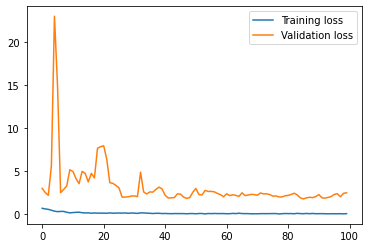

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
n_past = 16
n_days_for_prediction=15

In [ ]:
predict_period_dates = pd.date_range(list(train_date)[-n_past], periods=n_days_for_prediction, freq='1m').tolist()
print(predict_period_dates)

#Make prediction

[Timestamp('2021-07-31 00:00:00', freq='M'), Timestamp('2021-08-31 00:00:00', freq='M'), Timestamp('2021-09-30 00:00:00', freq='M'), Timestamp('2021-10-31 00:00:00', freq='M'), Timestamp('2021-11-30 00:00:00', freq='M'), Timestamp('2021-12-31 00:00:00', freq='M'), Timestamp('2022-01-31 00:00:00', freq='M'), Timestamp('2022-02-28 00:00:00', freq='M'), Timestamp('2022-03-31 00:00:00', freq='M'), Timestamp('2022-04-30 00:00:00', freq='M'), Timestamp('2022-05-31 00:00:00', freq='M'), Timestamp('2022-06-30 00:00:00', freq='M'), Timestamp('2022-07-31 00:00:00', freq='M'), Timestamp('2022-08-31 00:00:00', freq='M'), Timestamp('2022-09-30 00:00:00', freq='M')]


In [ ]:
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

1/1 [==============================] - 0s 380ms/step


In [ ]:
prediction_copies = np.repeat(prediction, df_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Policy Repo Rate':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
original = df[['Date', 'Policy Repo Rate']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2013-01-01']

<ipython-input-93-16db38d07ad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [ ]:
original.head()

,Date,Policy Repo Rate
24,2013-12-01,7.75
25,2013-11-01,7.75
26,2013-10-01,7.75
27,2013-09-01,7.50
28,2013-08-01,7.25


In [ ]:
original.tail()

,Date,Policy Repo Rate
136,2022-05-01,4.4
137,2022-04-01,4.0
138,2022-03-01,4.0
139,2022-02-01,4.0
140,2022-01-01,4.0


In [ ]:
original['Policy Repo Rate'].dtype.kind in 'iufc'

True

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Policy Repo Rate'>

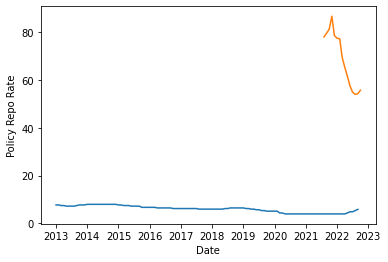

In [ ]:
sns.lineplot(original['Date'], original['Policy Repo Rate'])
sns.lineplot(df_forecast['Date'], df_forecast['Policy Repo Rate'])